In [19]:
#importing necessary libraries
import requests
import json
import pandas as pd
from matplotlib import pyplot as plt
import datetime
from decouple import config
from collections import Counter
import sqlalchemy
import sqlite3

In [20]:
def data_validation(df):
    #checking if the dataframe is empty
    if df.empty:
        print('Yikes, No songs were downloaded')

    #checking if there are duplicates
    if pd.Series(df['played_at']).is_unique:
        pass
    else:
        raise Exception("Yikes Primary Key check violated")

    #checking for nulls
    if df.isnull().values.any():
        raise Exception("Yike!!! Found Null values")
    
    return True

#function to calculate the frequencies
# def frequencies(column_name):
    
#     print(Counter(songs_df[column_name].values))
#     print(dict(Counter(songs_df[column_name].values).most_common(5)))
    
#     bar_plot = dict(Counter(songs_df[column_name].values).most_common(5))
    
#     plt.bar(*zip(*bar_plot.items()))
#     plt.show()
    
    
# plt.title('My title')
# plt.xlabel('categories')
# plt.ylabel('values')

In [21]:
headers = {
    "Accept": "application/json",
    "Content-Type": "application/json",
    "Authorization": f"Bearer {config('TOKEN')}"
}

In [22]:
#getting today's date
today = datetime.datetime.now()
print("today:",today)

today: 2021-07-08 11:32:29.536587


In [23]:
#getting last month's date
last_month = today - datetime.timedelta(days=300)
print("last_month",last_month)

last_month 2020-09-11 11:32:29.536587


In [24]:
#converting last month's date to unix time stamp
last_month_unix_timestamp = int(last_month.timestamp()) * 1000
print("last_month_Unix",last_month_unix_timestamp)

last_month_replace = last_month.replace(hour = 0, minute = 0, second = 0, microsecond = 0)
print("last_month_Replace:",last_month_replace)

last_month_Unix 1599823949000
last_month_Replace: 2020-09-11 00:00:00


In [25]:
url = f"https://api.spotify.com/v1/me/player/recently-played?after={last_month_unix_timestamp}"
r = requests.get(url, headers = headers)

In [49]:
data = r.json()

In [50]:
song_names = []
artiste_name = []
played_at_list = []
timestamps = []

for song in data["items"]:
    song_names.append(song['track']['name'])
    artiste_name.append(song['track']['album']['artists'][0]['name'])
    played_at_list.append(song['played_at'])
    timestamps.append(song['played_at'][0:10])

In [51]:
songs_dict = {
    "song_names":song_names,
    "artiste_name":artiste_name,
    "played_at":played_at_list,
    "timestamp":timestamps
}
songs_df = pd.DataFrame(songs_dict)
print(songs_df)

                              song_names  artiste_name  \
0                             goosebumps  Travis Scott   
1                 through the late night  Travis Scott   
2                             coordinate  Travis Scott   
3                               way back  Travis Scott   
4                               the ends  Travis Scott   
5                          In the Garden    Jim Reeves   
6                   Teach Me How to Pray    Jim Reeves   
7                        Whispering Hope    Jim Reeves   
8                      Across the Bridge    Jim Reeves   
9                       A Beautiful Life    Jim Reeves   
10                 I'd Rather Have Jesus    Jim Reeves   
11            Where We'll Never Grow Old    Jim Reeves   
12                         I'll Fly Away    Jim Reeves   
13  May the Good Lord Bless and Keep You    Jim Reeves   
14                       The Night Watch    Jim Reeves   
15                       Scarlet Ribbons    Jim Reeves   
16           T

In [52]:
if data_validation(songs_df):
    print("Data Validation Passed!")

Data Validation Passed!


In [53]:
# viewing the number of rows and columns
songs_df.shape

(20, 4)

In [54]:
#viewing summary of a DataFrame
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   song_names    20 non-null     object
 1   artiste_name  20 non-null     object
 2   played_at     20 non-null     object
 3   timestamp     20 non-null     object
dtypes: object(4)
memory usage: 768.0+ bytes


In [55]:
#viewing some basic statistical details
songs_df.describe()

,song_names,artiste_name,played_at,timestamp
count,20,20,20,20
unique,20,2,20,2
top,The Night Watch,Jim Reeves,2021-06-05T06:23:57.726Z,2021-06-05
freq,1,15,1,15


In [56]:
#returning the first 2 rows of the dataframe
songs_df.head()

,song_names,artiste_name,played_at,timestamp
0,goosebumps,Travis Scott,2021-06-06T15:27:17.991Z,2021-06-06
1,through the late night,Travis Scott,2021-06-06T15:12:53.316Z,2021-06-06
2,coordinate,Travis Scott,2021-06-06T15:07:25.009Z,2021-06-06
3,way back,Travis Scott,2021-06-06T15:03:38.695Z,2021-06-06
4,the ends,Travis Scott,2021-06-06T14:58:11.543Z,2021-06-06


## Which 5 songs did I listen to frequently?

In [57]:
print(Counter(songs_df['song_names'].values).most_common(5))

[('goosebumps', 1), ('through the late night', 1), ('coordinate', 1), ('way back', 1), ('the ends', 1)]


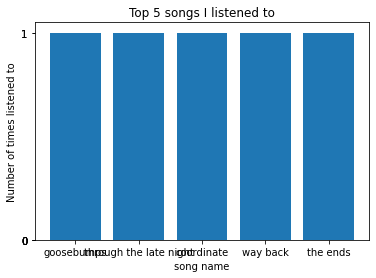

In [58]:
bar_plot = dict(Counter(songs_df['song_names'].values).most_common(5))
plt.bar(*zip(*bar_plot.items()))

yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
    
plt.yticks(yint)
plt.title('Top 5 songs I listened to')
plt.xlabel('song name')
plt.ylabel('Number of times listened to')

plt.show()

## Who are the top 5 artistes I listened to?

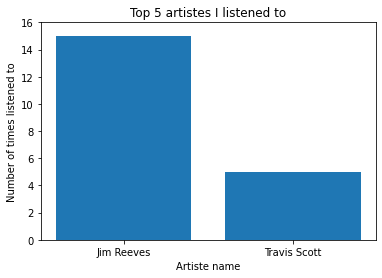

In [60]:
bar_plot = dict(Counter(songs_df['artiste_name'].values).most_common(5))
plt.bar(*zip(*bar_plot.items()))

yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
    
plt.yticks(yint)
plt.title('Top 5 artistes I listened to')
plt.xlabel('Artiste name')
plt.ylabel('Number of times listened to')

plt.show()

## How many songs did I listen to at each period of time in the day?

In [61]:
#converting played_at column to a datetime object
songs_df['played_at']=pd.to_datetime(songs_df['played_at'])

#creating a new column, period
songs_df['period'] = (songs_df['played_at'].dt.hour % 24 + 4) // 4
songs_df['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [62]:
songs_df.head()

,song_names,artiste_name,played_at,timestamp,period
0,goosebumps,Travis Scott,2021-06-06 15:27:17.991000+00:00,2021-06-06,Noon
1,through the late night,Travis Scott,2021-06-06 15:12:53.316000+00:00,2021-06-06,Noon
2,coordinate,Travis Scott,2021-06-06 15:07:25.009000+00:00,2021-06-06,Noon
3,way back,Travis Scott,2021-06-06 15:03:38.695000+00:00,2021-06-06,Noon
4,the ends,Travis Scott,2021-06-06 14:58:11.543000+00:00,2021-06-06,Noon


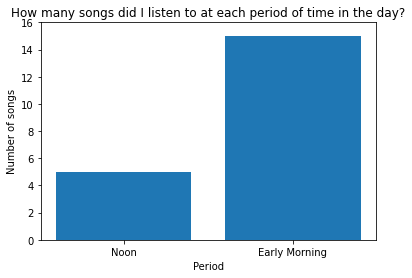

In [65]:
bar_plot = dict(Counter(songs_df['period'].values))
plt.bar(*zip(*bar_plot.items()))

yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
    
plt.yticks(yint)
plt.title('How many songs did I listen to at each period of time in the day?')
plt.xlabel('Period')
plt.ylabel('Number of songs')

plt.show()



In [29]:
# creating engine and connecting to database
engine = create_engine('sqlite:///my_songs.db') 
conn = sqlite3.connect('my_songs.db')

print ("Opened database successfully")

# creating the table with the columns
conn.execute("""
CREATE TABLE IF NOT EXISTS my_songs(
    song_name VARCHAR(200),
    artist_name VARCHAR(200),
    played_at VARCHAR(200),
    timestamp VARCHAR(200),
    period VARCHAR(20),
    CONSTRAINT primary_key_constraint PRIMARY KEY (played_at)
)
""")
print("Table created successfully")

conn.close()

Opened database successfully
Table created successfully


In [30]:
try:
    songs_df.to_sql('my_songs',engine,index=False, if_exists='append')
except:
    print("Ooops! Data already exists in the database ")